## Pattern recognition: Lab 5
### Tasks:
* Plot the error
* Model XOR with the help of sigmoid
* Add moments rule to learning equation


('epochs:', 0)
('epochs:', 10000)
('epochs:', 20000)
('epochs:', 30000)
('epochs:', 40000)
('epochs:', 50000)
('epochs:', 60000)
('epochs:', 70000)
('epochs:', 80000)
('epochs:', 90000)
(array([0, 0]), 0)
(array([0, 1]), 1)
(array([1, 0]), 1)
(array([1, 1]), 0)


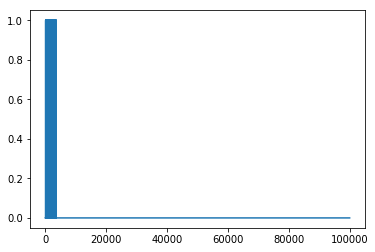

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x)*(1.0-sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1.0 - x**2


class NeuralNetwork:

    def __init__(self, layers):
        
        self.weights = []   
        self.errors = []
        self.activation = sigmoid
        self.activation_prime = sigmoid_prime
        
        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) - 1 #input
            self.weights.append(r)
            r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1 #output
            self.weights.append(r)
                        
    def fit(self, X, y, learning_rate=0.2, epochs=100000, momentum=1):

        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
         
        for k in range(epochs):
            allError = 0;
            for i in range(X.shape[0]):
                a = [X[i]]

                for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l])
                    activation = self.activation(dot_value)
                    a.append(activation)
                # output layer
                error = y[i]
                if a[-1] > 0.5:
                    error -= 1
                allError += abs(error)
                deltas = [error * self.activation_prime(a[-1])]

                for l in range(len(a) - 2, 0, -1): 
                    deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))

                deltas.reverse()

                prev_weights_delta = [0] * len(self.weights)
                for i in range(len(self.weights)):
                    layer = np.atleast_2d(a[i])
                    delta = np.atleast_2d(deltas[i])
                    
                    delta = learning_rate * layer.T.dot(delta)
                    self.weights[i] += delta
                    self.weights[i] += momentum * prev_weights_delta[i]
                    prev_weights_delta[i] = delta
                                        
            self.errors.append(allError/4)

            if k % 10000 == 0: 
                print('epochs:', k)
                
    def predict(self, x): 
    
        a = np.concatenate((np.ones(1).T, np.array(x)))

        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        
        res = 0
        if a > 0.5:
            res = 1
        return res

if __name__ == '__main__':

    nn = NeuralNetwork([2,2,1])
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    y = np.array([0, 1, 1, 0])
    nn.fit(X, y)
    for e in X:
        print(e,nn.predict(e))
        
    plt.plot(range(len(nn.errors)),nn.errors)
    plt.show()
    